In [11]:
#imports
import numpy as np
import pandas as pd
import datetime
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import random

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('src/kc_house_data.csv')

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Pearson correlation matrix

We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

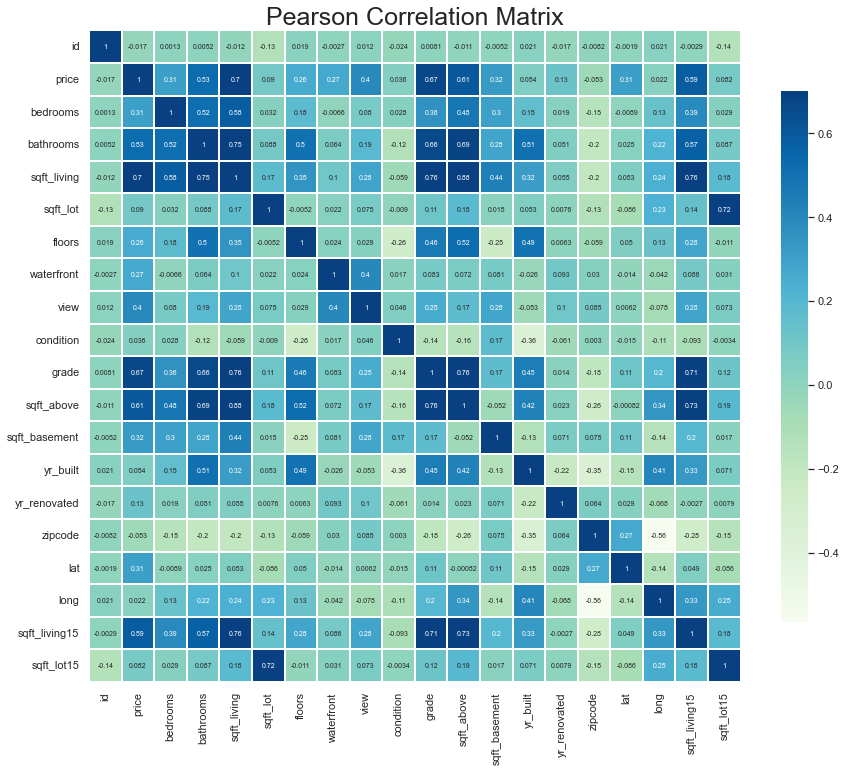

In [4]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",
            linecolor='w',annot=True, annot_kws={"size":7}, 
            cbar_kws={"shrink": .7})

Which features are more correlated to the price?


In [5]:
price_corr = data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [6]:
# drop date because it is irrelevant for our findings
data = data.drop(['date', 'id'],axis=1)

In [7]:
X = data.drop('price', axis=1)
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 18)
(6484, 18)
(15129,)
(6484,)


# Normalizing data

In [11]:
# scaler = MinMaxScaler()

# # fit and transfrom
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Creating model

In [ ]:
params = {'iterations':5000,
        'learning_rate':0.01,
        'depth':3,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'random_seed':55,
        #'cat_features':boston_categories,
        'metric_period':200,  
        'od_type':"Iter",  
        'od_wait':20,  
        'verbose':True,
        'use_best_model':True}
model = CatBoostRegressor(**params)

# Training model

In [22]:


model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         use_best_model=True,
         plot=True,
         verbose=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 363665.2904542	test: 368609.8133076	best: 368609.8133076 (0)	total: 3.62ms	remaining: 18.1s
200:	learn: 200868.0228422	test: 212952.9495973	best: 212952.9495973 (200)	total: 360ms	remaining: 8.61s
400:	learn: 162422.9241337	test: 176392.5758160	best: 176392.5758160 (400)	total: 736ms	remaining: 8.44s
600:	learn: 147513.1780051	test: 163096.4629424	best: 163096.4629424 (600)	total: 1.09s	remaining: 7.98s
800:	learn: 138843.7704975	test: 154866.2305579	best: 154866.2177582 (799)	total: 1.55s	remaining: 8.14s
1000:	learn: 133486.4680536	test: 149638.3112750	best: 149638.3112750 (1000)	total: 1.89s	remaining: 7.57s
1200:	learn: 129025.0058180	test: 145314.5431891	best: 145314.5431891 (1200)	total: 2.24s	remaining: 7.09s
1400:	learn: 125246.3356513	test: 141443.4410658	best: 141443.4410658 (1400)	total: 2.6s	remaining: 6.69s
1600:	learn: 122143.8627032	test: 138644.8468004	best: 138644.8468004 (1600)	total: 2.96s	remaining: 6.27s
1800:	learn: 119566.0617959	test: 136607.1800855	be

# Metrics

In [27]:
# predictions on the test set
y_pred = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Variance Regression Score: ',explained_variance_score(y_test,y_pred))


MAE:  68697.31312972741
MSE:  15082480154.594479
RMSE:  122810.74934465012
Variance Regression Score:  0.8901582742326871


# SHAP

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [63]:
shap_values2 = explainer(X_test)

In [44]:
type(X_test), type(y_test)
y_test

17384     297000.0
722      1578000.0
2680      562100.0
18754     631500.0
14554     780000.0
           ...    
18588    1100000.0
6784      700000.0
14510     380000.0
18917     268000.0
11750     206000.0
Name: price, Length: 6484, dtype: float64

## Local Explanation

In [57]:
sample = 3
pd.concat([X_test, y_test], axis=1).iloc[sample,:]

bedrooms              2.0000
bathrooms             1.0000
sqft_living        1130.0000
sqft_lot           2640.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             4.0000
grade                 8.0000
sqft_above         1130.0000
sqft_basement         0.0000
yr_built           1927.0000
yr_renovated          0.0000
zipcode           98109.0000
lat                  47.6438
long               -122.3570
sqft_living15      1680.0000
sqft_lot15         3200.0000
price            631500.0000
Name: 18754, dtype: float64

In [58]:
shap.force_plot(explainer.expected_value, shap_values[sample,:], 
                X_test.iloc[sample,:])

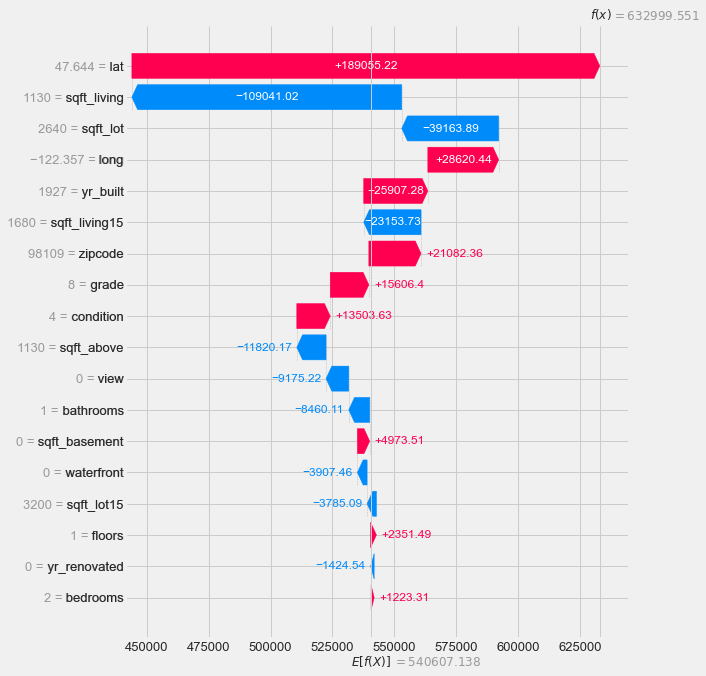

In [64]:
shap.plots.waterfall(shap_values2[sample], max_display=20)

## Global Explanation

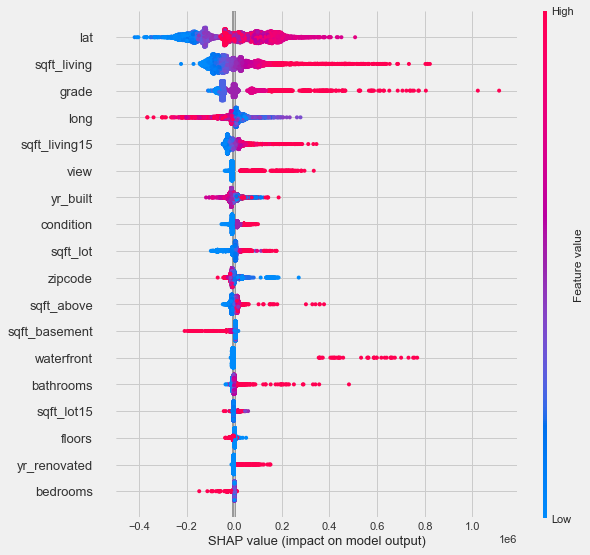

In [61]:
shap.summary_plot(shap_values, X_test, show=False)
plt.gcf().axes[-1].set_aspect(150)
plt.gcf().axes[-1].set_box_aspect(100)

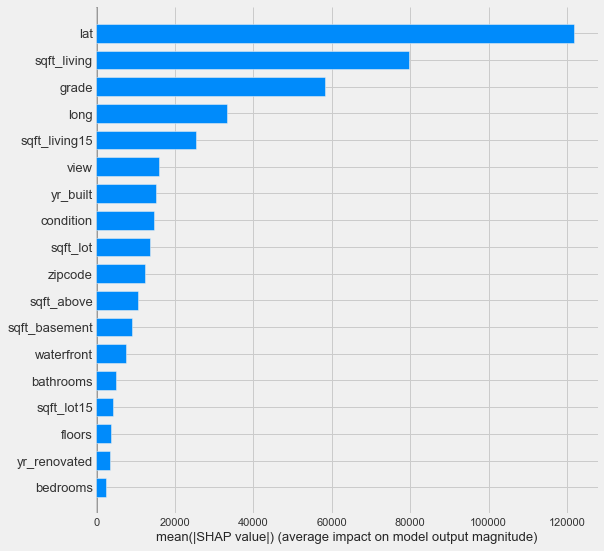

In [65]:
shap.summary_plot(shap_values2, X_test,plot_type="bar") 

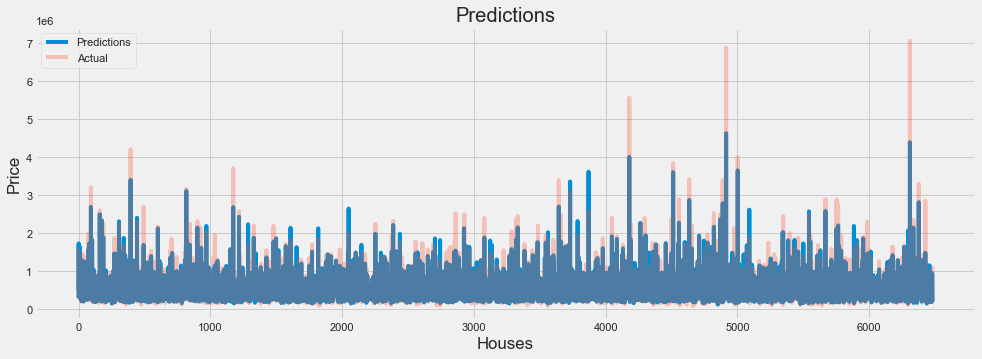

In [26]:
# plot data
plt.figure(figsize=(15,5))
plt.plot(pred, label='Predictions')
plt.plot(y, label='Actual', alpha=0.3)
# plt.scatter(showing[:,0], showing[:,1], label='Pred')

plt.xlabel('Houses')
plt.ylabel('Price')
plt.title('Predictions')
plt.legend()
plt.show()